In [1]:
import astropy
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
import sys
sys.path.append("../src/")
from utils import show_imstat, plot_line, plot_zscale_image
from image_reduction import overscan_sub_trim, reduce_images

import numpy as np

from astropy.visualization import ZScaleInterval
from astropy import stats as astrostats

import scipy
import scipy.stats as scistats

from astropy.nddata import CCDData

In [2]:
import os
from pathlib import Path

In [3]:
obs_dir = Path("/d/users/brook/Research/desi/sample_nights", "20210817")

In [9]:
all_images = obs_dir.glob("*.fit")

In [10]:
obs_dir / "log.txt"

PosixPath('/d/users/brook/Research/desi/sample_nights/20210817/log.txt')

In [11]:
bias = "a288-a317"

In [12]:
bias_images = [obs_dir / f"a{i}.fit" for i in range(288, 290)]    

In [13]:
sci_images = list(set(all_images) - set(bias_images))

In [ ]:
reduce_images(sci_images, bias_images, None, None, output_dir="../test_reduce/")

In [14]:
from astropy.modeling import models, fitting, polynomial
import astropy.units as u
import ccdproc as ccdp


poly = polynomial.Polynomial1D(degree=3)
cheb = polynomial.Chebyshev1D(degree=3)
leg = polynomial.Legendre1D(degree=3)
herm = polynomial.Hermite1D(degree=3)

ccd_im = CCDData.read(sci_images[10], unit=u.adu)
# ccd_im.data = ccd_im.data.T

output_im = overscan_sub_trim(sci_images[10], overscan_fit=cheb)

Mean: 454.8935249255952 Std: 378.6620720945722 Median: 485.0 RMS: 21.32823304743258 Min: 189 Max: 31909


(454.8935249255952, 378.6620720945722, 485.0)

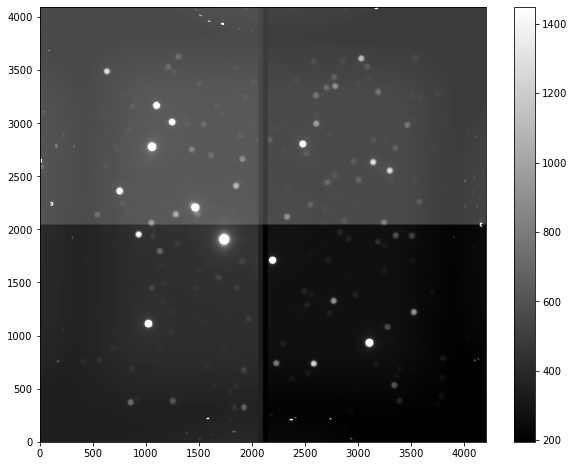

In [15]:
fig = plt.figure(figsize=(10, 8))
vmin, vmax = plot_zscale_image(ccd_im, fig.gca(), cmap="gray")
show_imstat(ccd_im.data)

Mean: 61.80570697784424 Std: 358.26372996936414 Median: 48.0 RMS: 7.861660573812904 Min: -7 Max: 31562


(61.80570697784424, 358.26372996936414, 48.0)

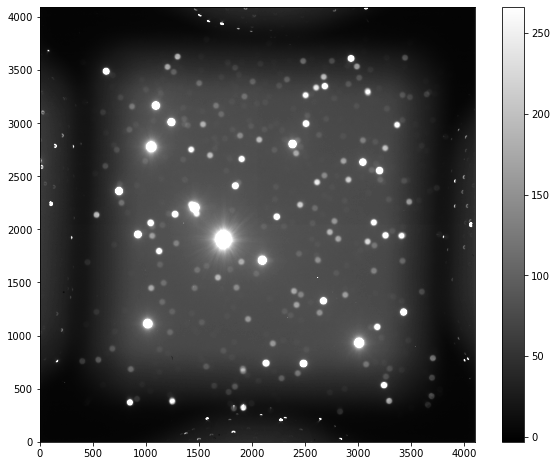

In [16]:
fig = plt.figure(figsize=(10, 8))
vmin, vmax = plot_zscale_image(output_im, fig.gca(), cmap='gray')
show_imstat(output_im.data)

Mean: 426.7233619213696 Std: 647.3148866839026 Median: 395.0 RMS: 20.657283507793796 Min: 340 Max: 31909
Mean: -201.82742600928634 Std: 645.9258502068061 Median: -226.0 RMS: nan Min: -324 Max: 31242


/d/users/brook/Research/desi/WIRO-observation/notebooks/../src/utils.py:24: RuntimeWarning: invalid value encountered in sqrt
  "RMS:", np.sqrt(np.mean(line)),


Mean: -206.25955953230766 Std: 652.249287427284 Median: -227.0 RMS: nan Min: -324 Max: 31242


(-206.25955953230766, 652.249287427284, -227.0)

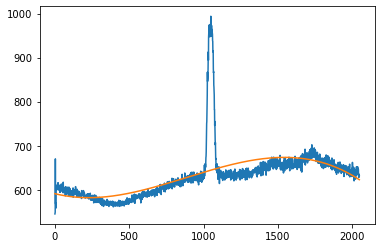

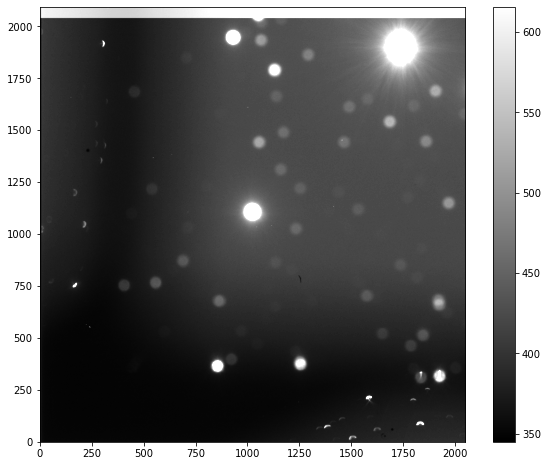

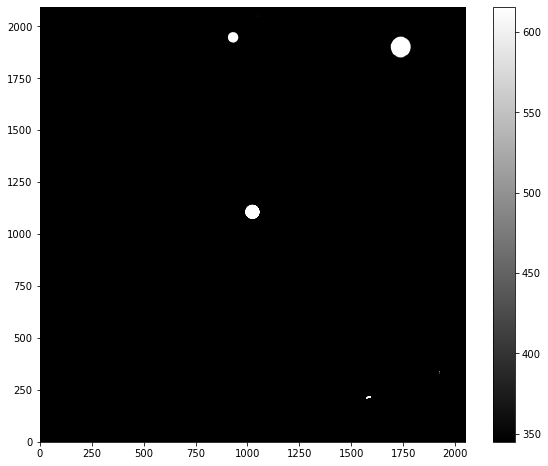

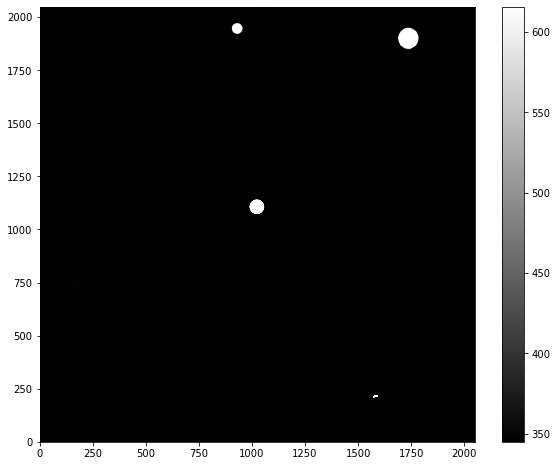

In [18]:
amp1 = ccd_im[8 - 1 : 2100 + 1, 0 : 2048 +1]
colnum = 2070
amp1.data = amp1.data.T
fit_poly = fitting.LevMarLSQFitter()
cheb_overscan = fit_poly(cheb, np.arange(0, amp1.data.shape[0]), amp1.data[0 : 2048+1, colnum])
xdata = np.arange(0, amp1.data.shape[0])
plt.plot(xdata, amp1.data[0 : 2048 + 1, 2070])
plt.plot(xdata, cheb_overscan(xdata))
amp1.data = amp1.data.T

fig = plt.figure(figsize=(10, 8))
vmin, vmax = plot_zscale_image(amp1, fig.gca(), cmap='gray')
show_imstat(amp1.data)

amp1.data = amp1.data.T
amp1_z = ccdp.subtract_overscan(
        amp1, overscan=amp1[0 : 2048 + 1, 2054 - 1 : 2089 + 1], model=cheb,
)
amp1.data = amp1.data.T
amp1_z.data = amp1_z.data.T

fig = plt.figure(figsize=(10, 8))
plot_zscale_image(amp1_z, fig.gca(), vmin=vmin, vmax=vmax, cmap='gray')
show_imstat(amp1_z.data)

amp1_zt = ccdp.trim_image(amp1_z[0 : 2048 + 1, :])
# amp1_zt.data = amp1_zt.data.T

fig = plt.figure(figsize=(10, 8))
plot_zscale_image(amp1_zt, fig.gca(), vmin=vmin, vmax=vmax, cmap='gray')
show_imstat(amp1_zt.data)